In [1]:
from __future__ import absolute_import
from __future__ import print_function
import os


import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, Cropping2D
from keras.layers.normalization import BatchNormalization

from keras.layers import Conv2D, Conv2DTranspose

from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, merge
from keras.regularizers import l2
from keras.models import Model



from keras import backend as K

import cv2
import numpy as np
import json

K.set_image_dim_ordering('tf')

import cv2
import numpy as np
import json


np.random.seed(7) # 0bserver07 for reproducibility

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

class_weighting = [
 0.2595,
 0.1826,
 4.5640,
 0.1417,
 0.5051,
 0.3826,
 9.6446,
 1.8418,
 6.6823,
 6.2478,
 3.0,
 7.3614
]


# load the model:
with open('tiramisu_fc_dense67_model_12_func.json') as model_file:
    tiramisu = models.model_from_json(model_file.read())

# load weights
tiramisu.load_weights("weights/prop_tiramisu_weights_67_12_func_10-e5_decay.best.hdf5")


# section 4.1 from the paper
optimizer = RMSprop(lr=0.001, decay=0.00001)
tiramisu.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [4]:
data_shape =  224 * 224


val_data = np.load('./data/val_data.npy')
val_data = val_data.reshape((101, 224, 224, 3))
val_label = np.load('./data/val_label.npy')


In [5]:
batch_size = 2

# estimate accuracy on whole dataset using loaded weights
scores = tiramisu.evaluate(val_data, val_label, verbose=2, batch_size=batch_size)
print("%s: %.2f%%" % (tiramisu.metrics_names[1], scores[1]*100))

acc: 72.51%


In [6]:

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    if plot:
        plt.imshow(rgb)
    else:
        return rgb



# load the data
train_data = np.load('./data/train_data.npy')
train_data = train_data.reshape((367, 224, 224, 3))



In [7]:

import os
DataPath = './CamVid/'

gt = []
with open(DataPath+'train.txt') as f:
    txt = f.readlines()
    txt = [line.split(' ') for line in txt]
for i in range(len(txt)):
    gt.append(cv2.imread(os.getcwd() + txt[i][0][7:]))



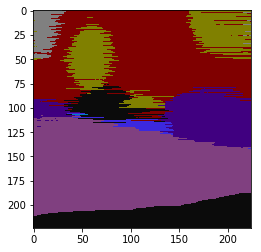

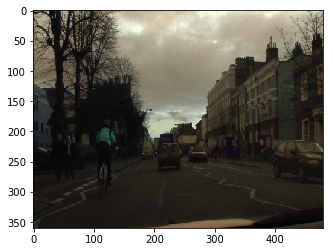

In [8]:
output = tiramisu.predict(train_data[23:24])
pred = visualize(np.argmax(output[0],axis=1).reshape((224,224)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[23])

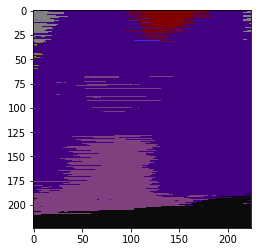

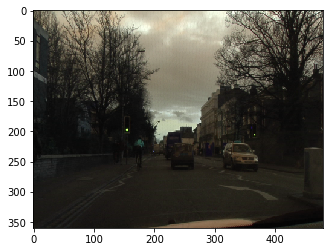

In [9]:
output = tiramisu.predict(train_data[0:1])
pred = visualize(np.argmax(output[0],axis=1).reshape((224,224)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[20])

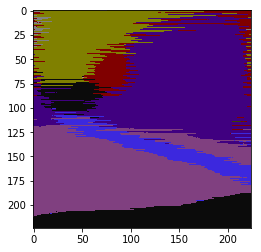

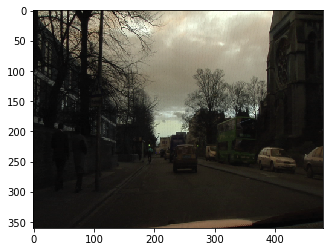

In [10]:
output = tiramisu.predict(train_data[16:17])
pred = visualize(np.argmax(output[0],axis=1).reshape((224,224)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt[15])